**WINE QUALITY PREDICTION**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("/content/wine_quality_data.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data.isnull().sum()  # no missing

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

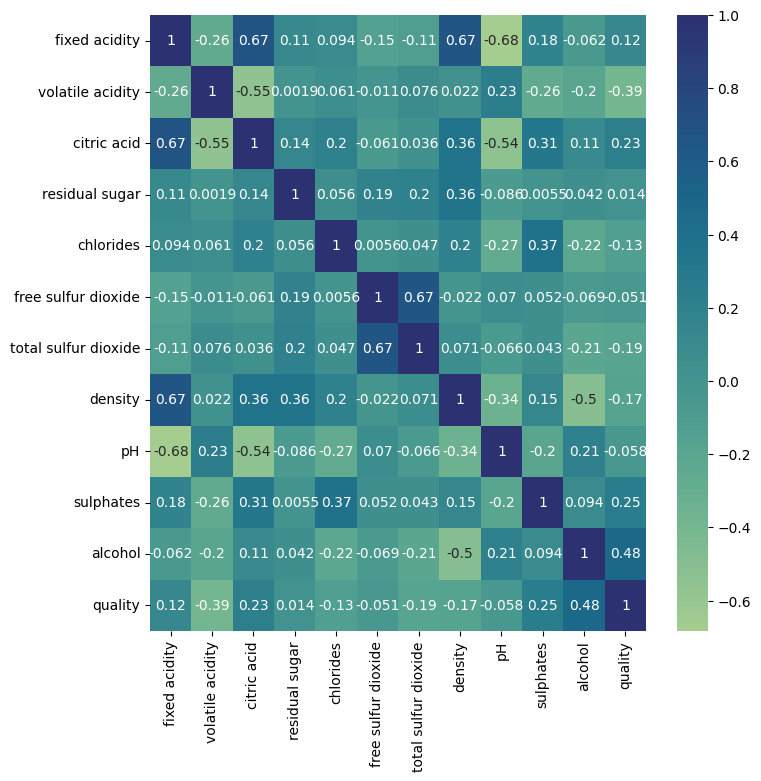

In [7]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(),cmap="crest",annot=True)

In [8]:
fig = px.box(data, y="alcohol", x="quality", color="quality",
             hover_data=data.columns,
            title = "Alcohol and Quality in Red Wine")
fig.show()

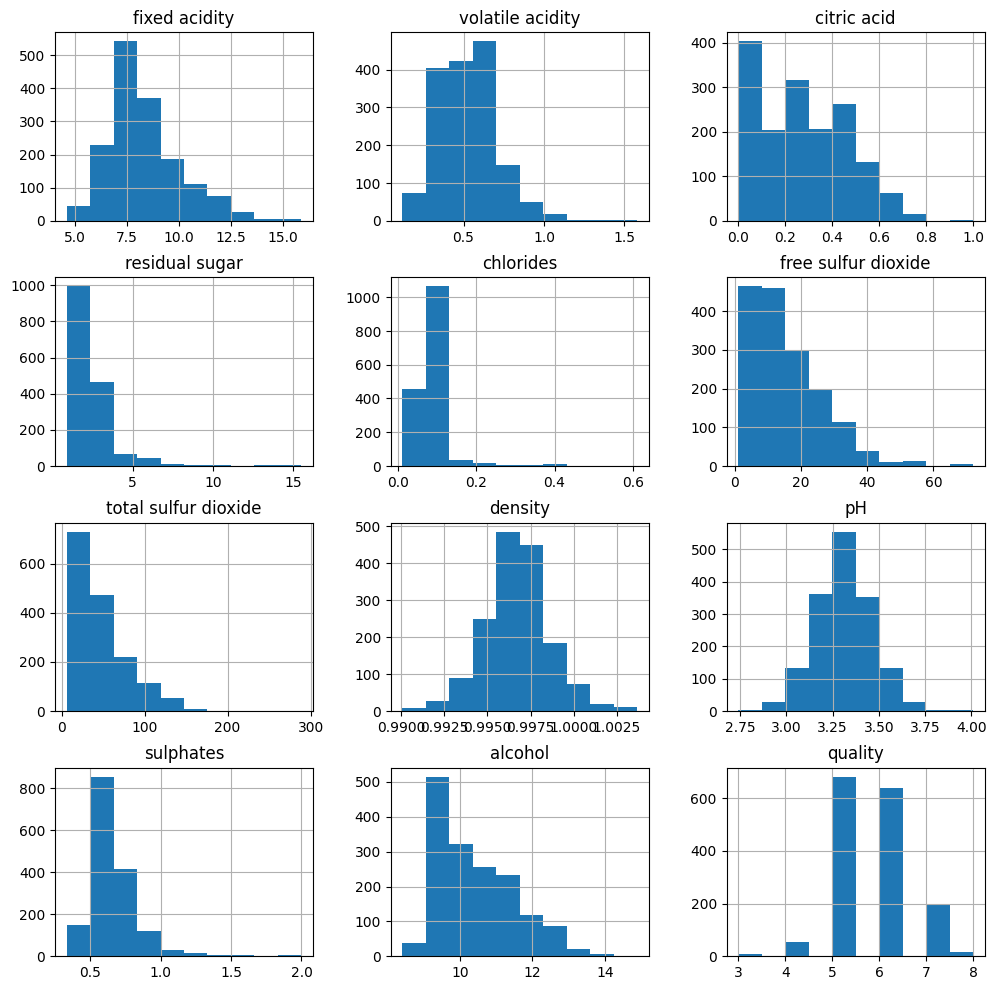

In [9]:
data.hist(figsize=(12,12))
plt.show()

In [10]:
y = data['quality']
X = data.drop(columns = 'quality')

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



MSE = 0.33


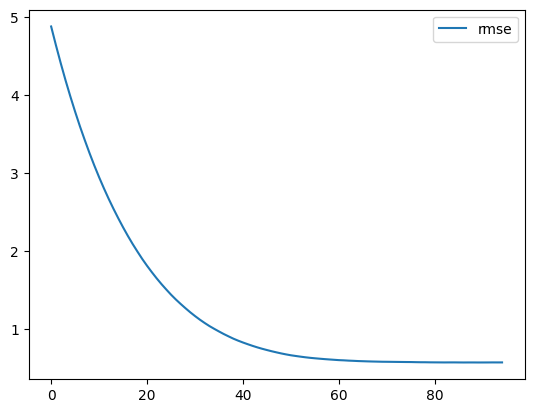

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

exb = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

#training the data
exb.fit(X_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(X_test, y_test)],
             verbose=False)

#making our predictions
exb_pred = exb.predict(X_test)

#getting the mse
exb_mse = mean_squared_error(y_test, exb_pred)
print("MSE =",(round(exb_mse,2)))

#getting the training resutls
results = exb.evals_result()
plt.plot(results['validation_0']['rmse'], label='rmse')
# show the legend
plt.legend()
# show the plot
plt.show()

Minimum validation loss: 0.49279651045799255
10/10 [==============================] - 0s 2ms/step
MSE = 0.42


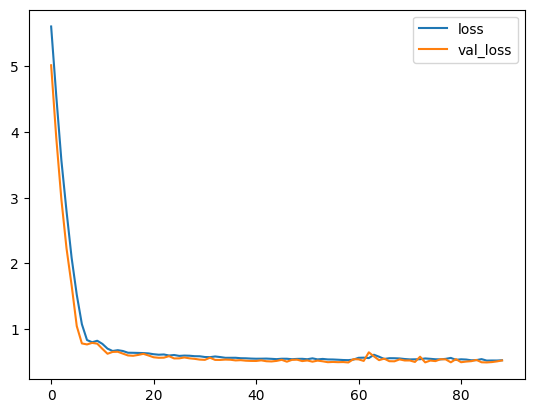

In [13]:
#deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

seed = 1
tf.random.set_seed(seed)

#setting up the keras sequential model
model = keras.Sequential([
    layers.Dense(28, activation='relu', input_shape=[11]),
    layers.Dense(28, activation='relu'),
    layers.Dense(28, activation='relu'),
    layers.Dense(1),
])

#compiling the model perameters
model.compile(
    optimizer='adam',
    loss='mae'
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

#traing the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

#plotting the loss results
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0)

#making the predictions
dnn_pred = model.predict(X_test)

#getting our results
dnn_mse = mean_squared_error(y_test,dnn_pred)

#printing rmse
print("MSE =",(round(dnn_mse,2)))